# Twitter US Airlines Sentiments Dataset

Given the dataset, create a data mining research using the following insights:

* **Sentiment Distribution**: Assess the overall sentiment landscape across all tweets to understand public opinion trends.
* **Airlines-Specific Sentiment**: Compare Distribution among different airlines to identify which ones receive more positive or negative feedback.
* **Negative Reasons Analysis** – Delve into the specific reasons behind negative sentiments to pinpoint common customer complaints.
* **Temporal Patterns**: Analyze tweet timestamps to uncover any time-based trends in customer feedback.


In [8]:
# DO NOT CHANGE THIS SECTION
# Run this section to initialize your dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive file link
url = 'https://drive.google.com/file/d/13khsGi46XgI03H7kAmI-mzN-vdjE18ji/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = f'https://drive.google.com/uc?id={file_id}'

# Read dataset
tweets_df = pd.read_csv(dwn_url)

Give a detailed explanation of each insight given, following the rubrics below:

## Rubric
| Criteria                     | Excellent (10 pts) | Good (7–9 pts)  | Fair (4–6 pts)  | Poor (1–3 pts)  |
|------------------------------|------|------|------|-----------|
|  1.  **Data Cleaning & Preparation**   | Text data is thoroughly cleaned (e.g., case normalization, stopword removal); preprocessing choices are well-documented.| Most data cleaning is done; minor inconsistencies or undocumented choices exist. | Limited preprocessing or inconsistent cleaning of text data. | Text data is unprocessed or poorly handled. |
| 2.  **Insight 1: Sentiment Distribution** | No Submission *(0 Point)* | The applied algorithm needs major revision. *(1 Point)* | The applied algorithm needs minor revision. *(3 Points)* | The applied algorithm is correctly implemented. *(6 Points)* |
| 3.  **Insight 2: Airline-Specific Sentiment** | Sentiment comparisons across airlines are well-analyzed using grouped bar charts or similar visuals; differences are clearly interpreted and contextualized. | Airline sentiment breakdown is correct and visualized, though insights may lack depth. | Basic comparisons without clear visual support or interpretation. | No or incorrect analysis by airline (or topic group).
| 4.  **Insight 3: Negative Reasons Analysis** | Specific reasons for negative sentiment are extracted (e.g., using keyword grouping or classification); analysis highlights dominant complaint types. | Some grouping or counting of negative reasons is done with limited analysis. | Negative reasons are listed but not meaningfully analyzed or interpreted. | No negative reason analysis or incorrect handling.
| 5.  **Insight 4: Temporal Patterns** | Tweet timestamps are analyzed (e.g., by hour/day) and correlated with sentiment; patterns or anomalies are explained thoughtfully. | Basic time-based sentiment trends are shown; interpretation is present but could be stronger. | Minimal or unclear temporal analysis; weak interpretation. | No time-based trend analysis or misinterpretation.
| 6.  **Visualization & Dashboarding** | Visuals (e.g., bar charts, line plots, word clouds) are well-labeled, clear, and enhance storytelling. | Most visuals are appropriate and aid understanding. | Some visuals are unclear or lack proper labeling/context. | Visuals are misleading, unreadable, or absent.
| 7.  **Interpretation & Insights** | Shows strong understanding of user sentiment and behaviors; interpretations are linked to real-world implications (e.g., brand image, customer service). | Most interpretations are logical and relevant; may lack depth in a few areas. | Basic observations made, but deeper connections are missing. | Interpretations are absent or not supported by the data.
| 8.  **Code Quality & Reproducibility** | Code is clean, modular, and documented; project is fully reproducible. | Code runs and is fairly well-organized; minor documentation issues. | Code works but is hard to follow or lacks comments. | Code is messy, error-prone, or non-functional.
| 9.  **Presentation & Communication** | Project is well-structured and presented with a clear narrative and professional formatting (e.g., report or dashboard). | Presentation is clear with some formatting or narrative flow issues. | Project is understandable but lacks polish or logical flow. | Poorly structured or hard-to-follow presentation.

## Data Analysis

In [9]:
# Preprocessing
tweets_df["tweet_created"] = pd.to_datetime(tweets_df["tweet_created"], errors="coerce")
tweets_df["hour"] = tweets_df["tweet_created"].dt.hour

In [21]:
# 1. Sentiment Distribution
sentiment_distribution = tweets_df["airline_sentiment"].value_counts().reset_index()
sentiment_distribution.columns = ["Sentiment", "Count"]
print("\nSentiment Distribution:")
sentiment_distribution


Sentiment Distribution:


,Sentiment,Count
0,negative,9178
1,neutral,3099
2,positive,2363


In [20]:
# 2. Airline-Specific Sentiment
airline_sentiment = tweets_df.groupby(["airline", "airline_sentiment"]).size().unstack(fill_value=0)
print("\nAirline-Specific Sentiment Distribution:")
airline_sentiment


Airline-Specific Sentiment Distribution:


airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [19]:
# 3. Negative Reasons Analysis
negative_reasons = tweets_df["negativereason"].value_counts().reset_index()
negative_reasons.columns = ["Reason", "Count"]
top_neg_reasons = negative_reasons.head(5)

# Output the result
print("\nTop 5 Reasons for Negative Sentiment:")
top_neg_reasons


Top 5 Reasons for Negative Sentiment:


,Reason,Count
0,Customer Service Issue,2910
1,Late Flight,1665
2,Can't Tell,1190
3,Cancelled Flight,847
4,Lost Luggage,724


In [17]:
# 4. Temporal Patterns
temporal_hourly = tweets_df.groupby(["hour", "airline_sentiment"]).size().unstack(fill_value=0)
print("\nTemporal Patterns by Hour:")
temporal_hourly


Temporal Patterns by Hour:


airline_sentiment,negative,neutral,positive
hour,,,
0,97,20,14
1,80,23,8
2,109,46,19
3,146,46,33
4,236,74,58
5,313,97,67
6,395,124,102
7,475,170,131
8,556,212,158


## Visualizations

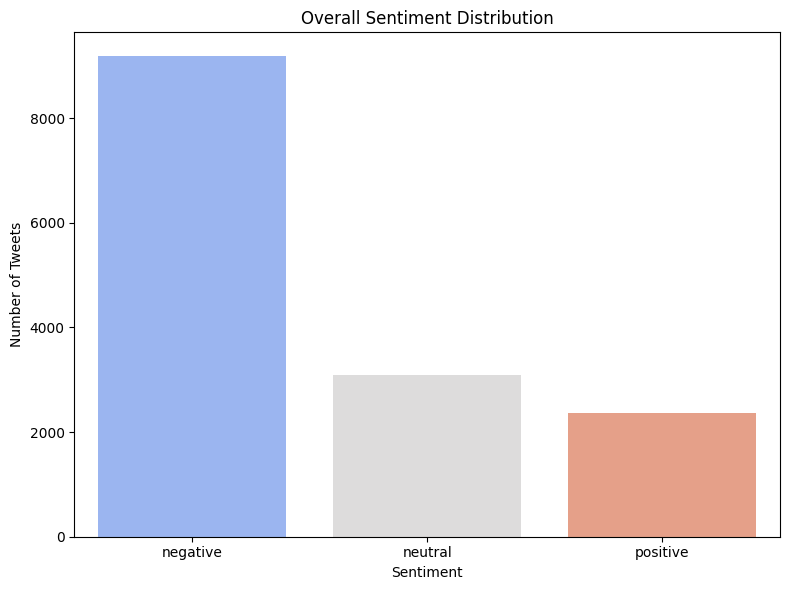

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(data=sentiment_distribution, x="Sentiment", y="Count", hue="Sentiment", palette="coolwarm", legend=False)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

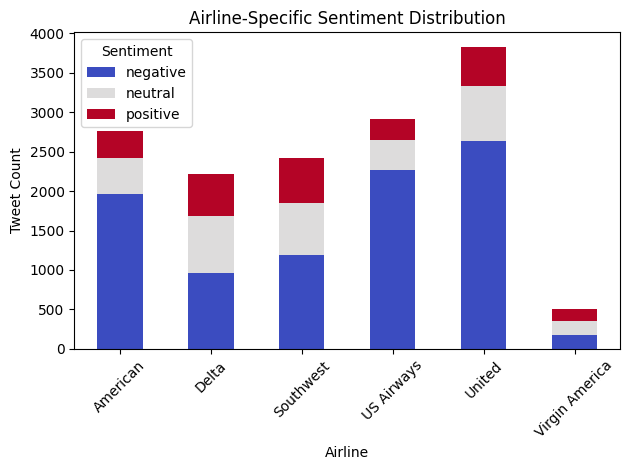

In [26]:
plt.figure(figsize=(10, 6))
airline_sentiment[["negative", "neutral", "positive"]].plot(
    kind="bar",
    stacked=True,
    colormap="coolwarm"
)
plt.title("Airline-Specific Sentiment Distribution")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


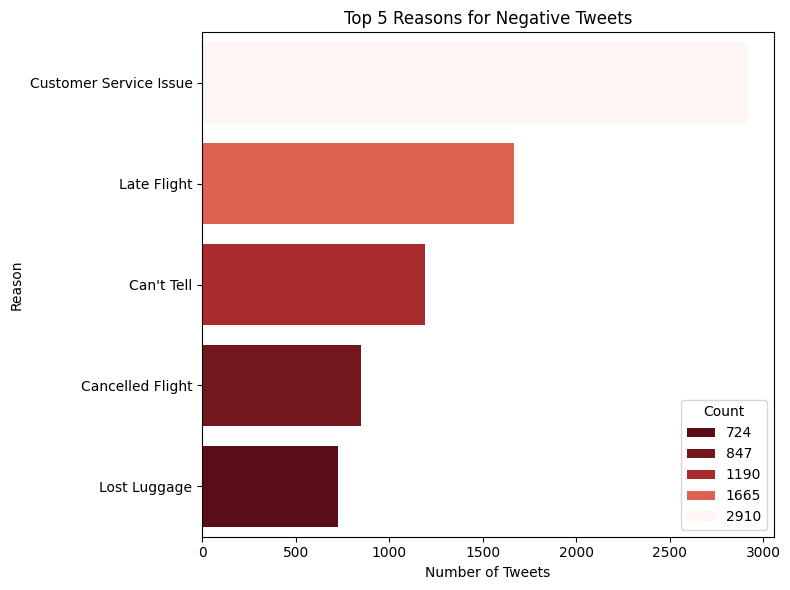

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_neg_reasons, x="Count", y="Reason", hue="Count", palette="Reds_r")
plt.title("Top 5 Reasons for Negative Tweets")
plt.xlabel("Number of Tweets")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

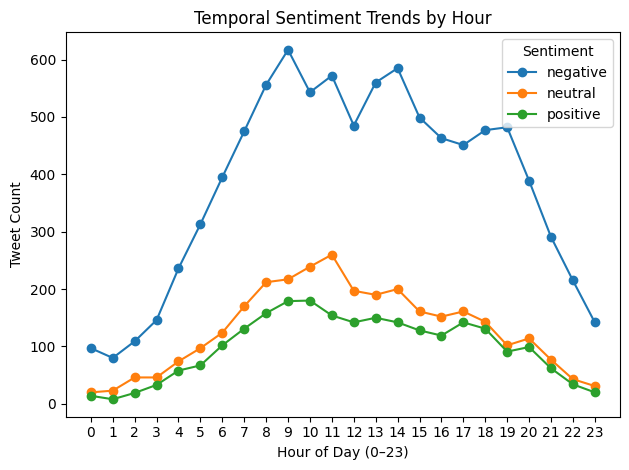

In [29]:
plt.figure(figsize=(10, 6))
temporal_hourly.plot(
    kind="line",
    marker='o'
)
plt.title("Temporal Sentiment Trends by Hour")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## Data Mining Research Report

**Insight 1: Sentiment Distribution**

Objective: Understand overall public opinion about US airlines based on tweet sentiments.

Findings:
* **Negative tweets** dominate the sentiment landscape, accounting for 9,178 tweets (≈61%).
* Neutral tweets follow with 3,099 (≈21%), while positive tweets are the least frequent at 2,363 (≈16%).

Analysis:
* This distribution highlights a general dissatisfaction among airline passengers on Twitter.
* It could suggest either service quality issues or that social media is used more for complaints than praise.

**Insight 2: Airline-Specific Sentiment**

Objective: Compare sentiment distributions across different airlines to identify perception patterns.

Findings:
* **United Airlines** received **the most negative tweets (2,633)**.
* US Airways and American Airlines also show high negative sentiment (2,263 and 1,960 respectively).
* Delta and Southwest Airlines have a more balanced sentiment spread.
* Virgin America received relatively fewer negative tweets (181) and shows a more even sentiment distribution.

Analysis:
* The data suggests that larger carriers like United and American might be struggling with customer satisfaction.
* Virgin America’s lower tweet volume may influence its distribution but indicates a relatively better customer perception.

**Insight 3: Negative Reasons Analysis**

Objective: Identify the most common reasons behind negative sentiment to reveal customer pain points.

Findings:

Top reasons for negative tweets include:
* Customer Service Issues – 2,910 tweets
* Late Flights – 1,665 tweets
* Unclear Complaints ("Can't Tell") – 1,190 tweets
* Cancelled Flights – 847 tweets
* Lost Luggage – 724 tweets

Analysis:
* Customer service is by far the most frequently cited issue.
* Operational challenges like delays and cancellations also heavily impact customer experience.
* "Can't Tell" indicates tweets with negative tone but unclear specifics, potentially a sign of emotional venting or sarcasm.

**Insight 4: Temporal Patterns**

Objective: Analyze how sentiment varies by time of day.

Findings:
* Negative sentiment is consistently high throughout the day, but particularly spikes around early morning hours (4–7 AM) and again during evening (5–9 PM).
* Positive and neutral sentiments also rise during typical travel hours, reflecting real-time passenger experiences.

Analysis:
* Morning spikes may correspond to early flights and overnight issues.
* Evening spikes could reflect delays and customer frustrations after a long day of travel.

This insight helps airlines anticipate complaint surges and adjust customer support staffing accordingly.

## Conclusion
This research provides actionable insights into public sentiment, airline perception, common complaints, and time-based behavior of airline passengers on Twitter. Airlines can use these findings to prioritize service improvements, enhance customer support during peak hours, and address frequent pain points like delays and customer service quality.